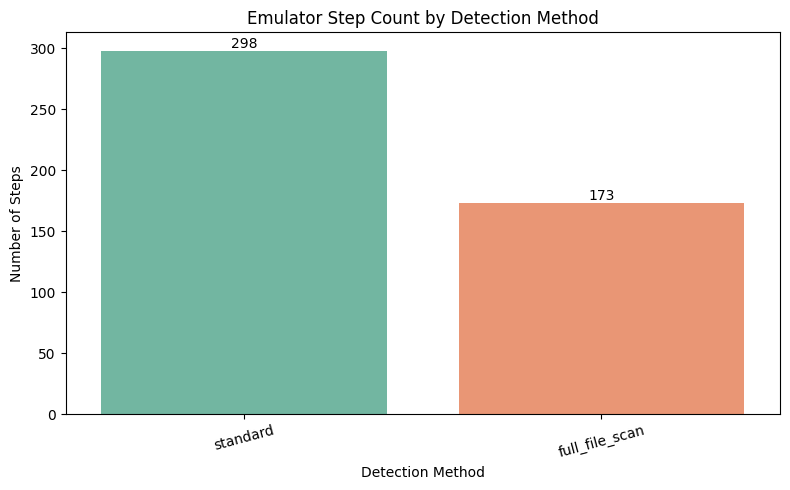

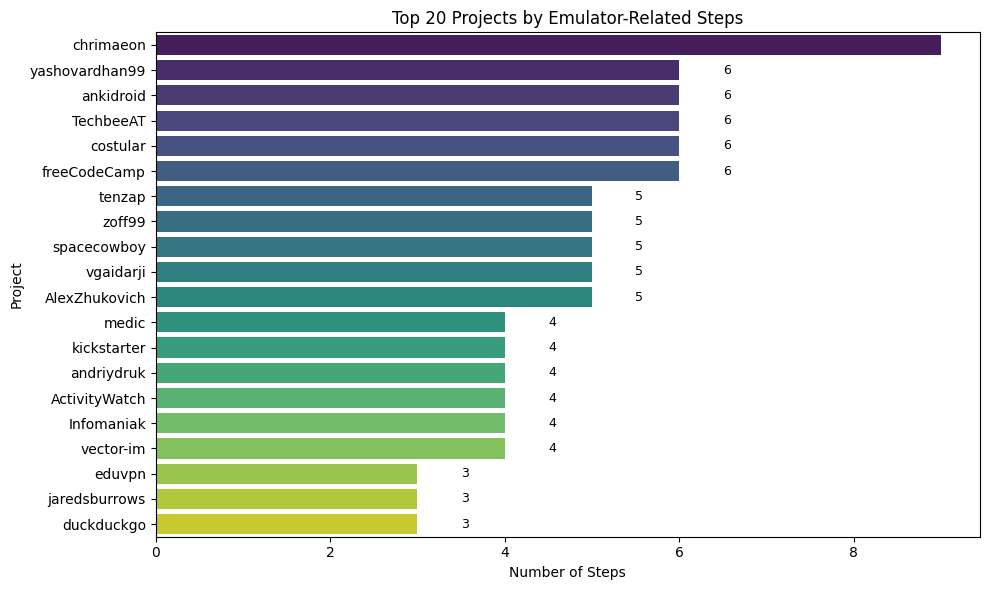

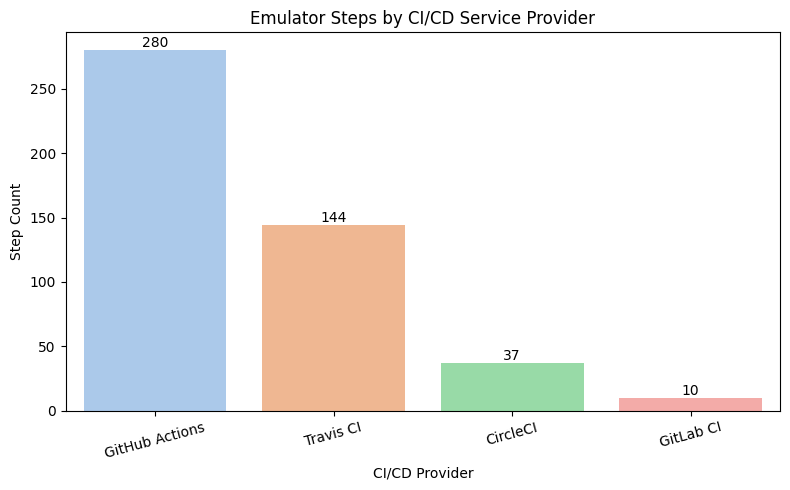

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from itertools import chain

# === File path ===
csv_path = r"C:\GitHub\Android-Mobile-Apps\emulator_steps_summary.csv"

# === Load data ===
df = pd.read_csv(csv_path)
df.fillna('', inplace=True)

# === 1. Chart: Count of Steps by Detection Method ===
detection_counts = df['detection_method'].value_counts().reset_index()
detection_counts.columns = ['detection_method', 'count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=detection_counts, x='detection_method', y='count', hue='detection_method', palette='Set2', legend=False)
plt.title('Emulator Step Count by Detection Method')
plt.xlabel('Detection Method')
plt.ylabel('Number of Steps')
plt.xticks(rotation=15)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# === 2. Aggregated Totals by Project ===
df['project'] = df['file'].apply(lambda x: os.path.basename(str(x)).split('.')[0])
project_counts = df['project'].value_counts().reset_index()
project_counts.columns = ['project', 'emulator_steps']
top_projects = project_counts.head(20)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_projects, x='emulator_steps', y='project', hue='project', palette='viridis', legend=False)
plt.title('Top 20 Projects by Emulator-Related Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Project')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width + 0.5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# === 3. Aggregated Totals by CI/CD Provider ===
def infer_provider(file_path):
    path_lower = str(file_path).lower()
    if 'github' in path_lower:
        return 'GitHub Actions'
    elif 'travis' in path_lower:
        return 'Travis CI'
    elif 'circleci' in path_lower:
        return 'CircleCI'
    elif 'bitrise' in path_lower:
        return 'Bitrise'
    elif 'gitlab' in path_lower:
        return 'GitLab CI'
    else:
        return 'Unknown'

df['provider'] = df['file'].apply(infer_provider)
provider_counts = df['provider'].value_counts().reset_index()
provider_counts.columns = ['CI/CD Provider', 'Emulator Step Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=provider_counts, x='CI/CD Provider', y='Emulator Step Count',
                 hue='CI/CD Provider', palette='pastel', legend=False)
plt.title('Emulator Steps by CI/CD Service Provider')
plt.xlabel('CI/CD Provider')
plt.ylabel('Step Count')
plt.xticks(rotation=15)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

